In [2]:
from IPython.display import Image

We'll learn two ways to use web data: using an API to request data (if one exists) or extracting data from web pages using web scraping. Web data allows us to access useful data online. It also allows for updated data and optimizing bandwidth (we can access only the part of the data we need). The main point, using web data, is to convert this information into dataframes.

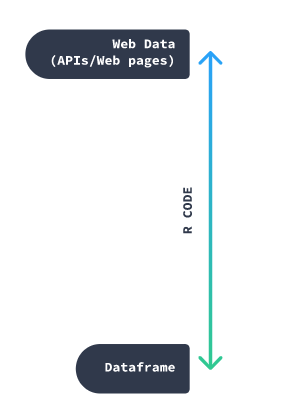

For now, let's focus on APIs. **APIs or Application Programming Interfaces** are tools that allow different applications to interact with each other. Programmers use APIs to query and retrieve data dynamically (which they can then integrate into their apps). The workflow is basically the same no matter which API we're using. We submit a request that follows specific programmatic rules, and we get a response containing content in an expected format

Github, Reddit, Spotify, Twitter, Facebook, and many other companies provide free APIs that make the information they store on their servers accessible — other companies charge for access to their APIs. Several public APIs are available [here](https://github.com/public-apis/public-apis#open-data), grouped by category.

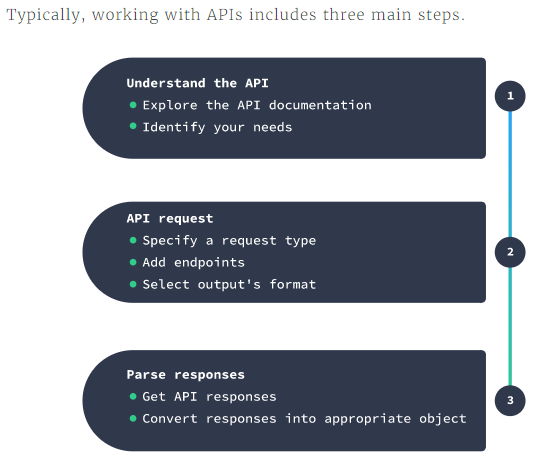

In this file, we'll query the [`World Bank(WB)` APIs](https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation) and parse its responses into dataframes. WB APIs provide access to several datasets and time series covering multiple topics (e.g., agriculture, economy, health, and more).

We will also build the custom `wb_api_json_get_df()` function that we can use to query WB APIs and use it as an inspiration for other APIs.

For now, let's look at what the `wb_api_json_get_df()` function can do, and then we'll learn to build it step-by-step.

Let's use the `wb_api_json_get_df()` function to query the topics covered by the WB APIs.

**Task**

1. Use this command to **query the topics** covered by the World Bank APIs: `wb_api_json_get_df("v2/topic?format=json")`.
2. **Explore** the `wb_topic` dataframe to see the topics covered by the World Bank APIs.

**Answer**

`wb_topic <- wb_api_json_get_df("v2/topic?format=json")
print(wb_topic)` # Print wb_topic to see the 21 topics available in the world bank API

Before making API requests, we have to understand the API documentation. We've already done this part of the work for the World Bank APIs. Now, we'll show how to use it.

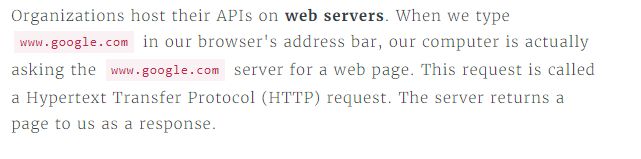

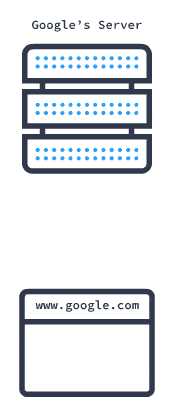

In [1]:
Image("apis_servers.gif")

APIs work much the same way, except instead of our web browser asking for a web page, a program, called the client, asks the server for data. The server returns a response to the client. The response contains **status information** about the request, and it may also include the **requested content**. A typical format for this content is [JavaScript Object Notation (JSON)](https://www.json.org/json-en.html).

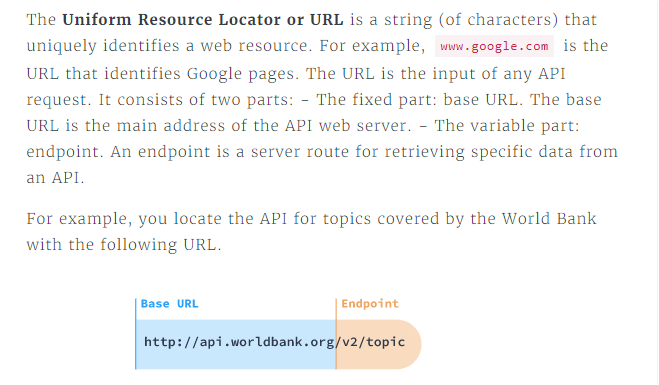

Basically, we follow four steps for API requests.

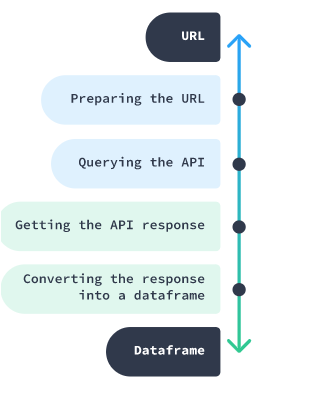

Most of the functions we need to complete these steps are in the [`httr` package](https://cran.r-project.org/web/packages/httr/vignettes/quickstart.html). We use the following code snippet for its installation.

`install.packages("httr")`

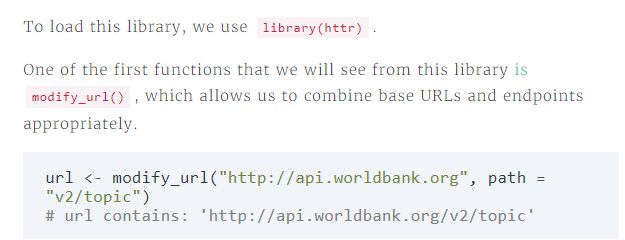

let's start building our `wb_api_json_get_df()` function by preparing the url to identify the countries covered by these topics.

**Task**

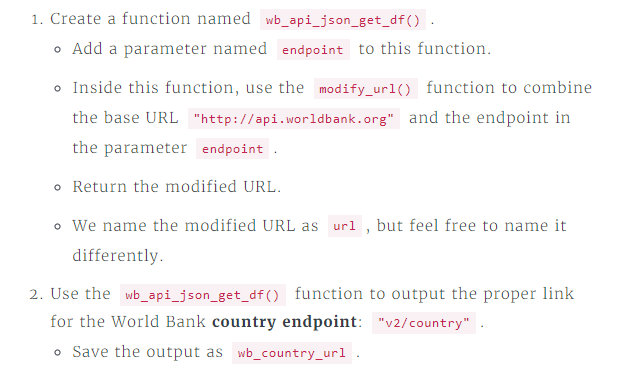

**Answer**

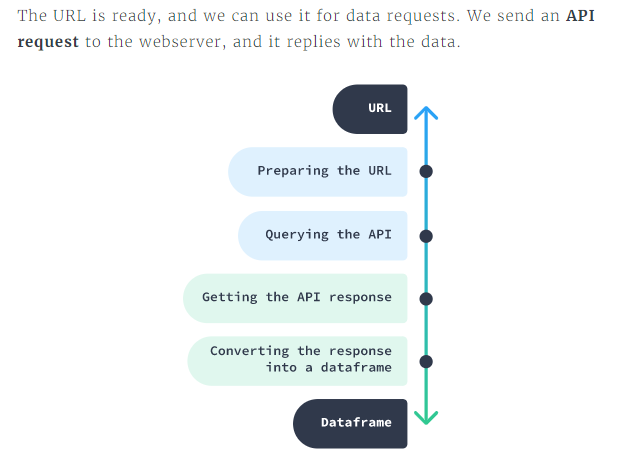

APIs use **HTTP verbs** for data requests. One of the most common is a **GET** request. We submit it within the URL with each parameter separated by an ampersand (&). For example, in `'http://api.worldbank.org/v2/topic?format=json'`, the `format=json` part is a GET request to send data in JSON format. GET requests vary by API.

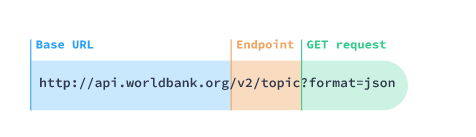

As we can probably see, the World Bank has several API endpoints. For example, the `/country` endpoint provides information about countries covered by the World Bank datasets. The `/region` endpoint might provide data about available regions. ([Check out the complete list](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures) of World Bank endpoints.)

The endpoint we're interested in is `/indicator`. This endpoint provides information about the time series indicators like total population, gross national income, energy use, and many more. Indicator queries return the following information in the response using the [`GET()` function](https://rdrr.io/cran/httr/man/GET.html) from the `httr` package:

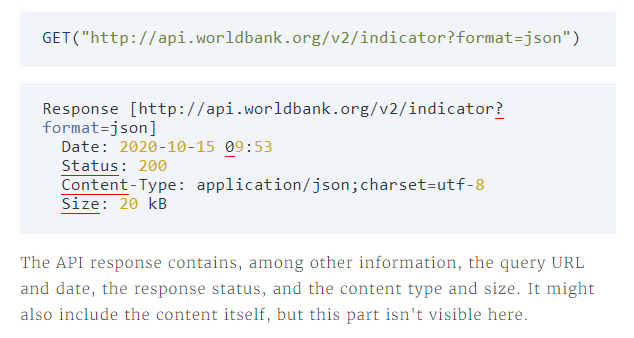

Let's use the `GET()` function to fetch the API's response.

**Task**

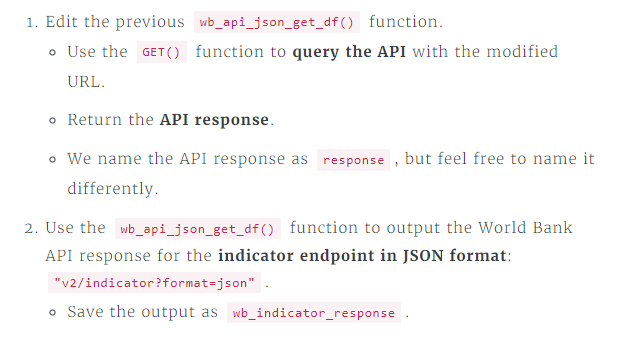

**Answer**

When making queries, it's entirely possible that something goes wrong or that the output is not of the right type. Therefore, it's important to track these errors.

The request that we made above yields this:

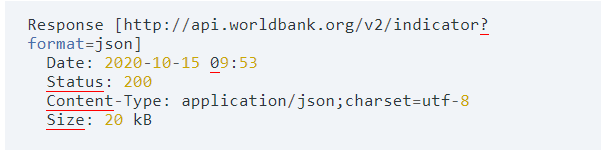

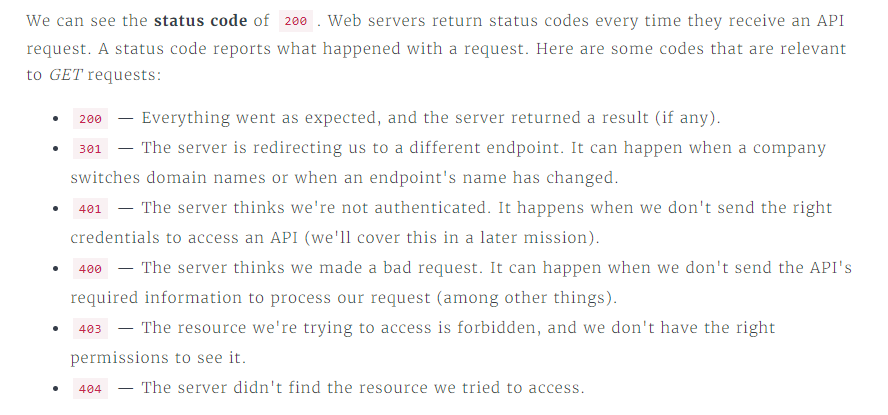

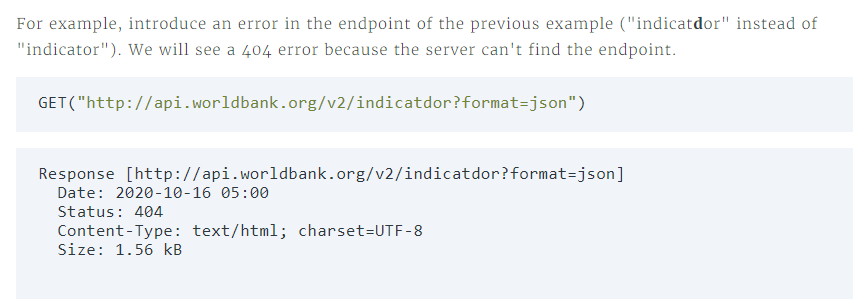

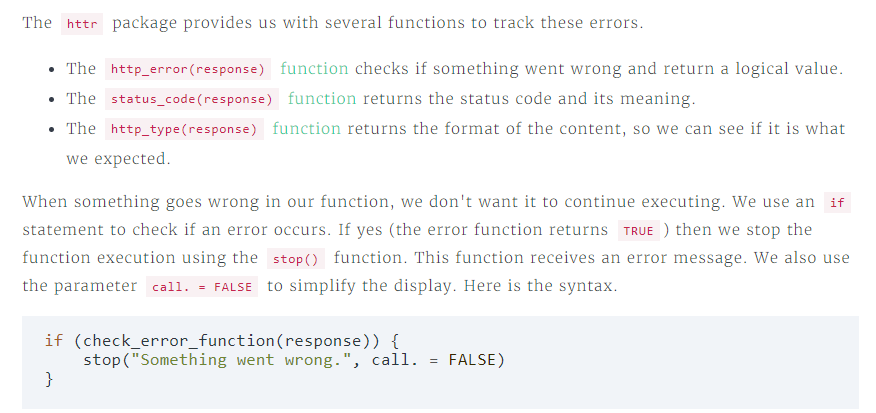

**Task**

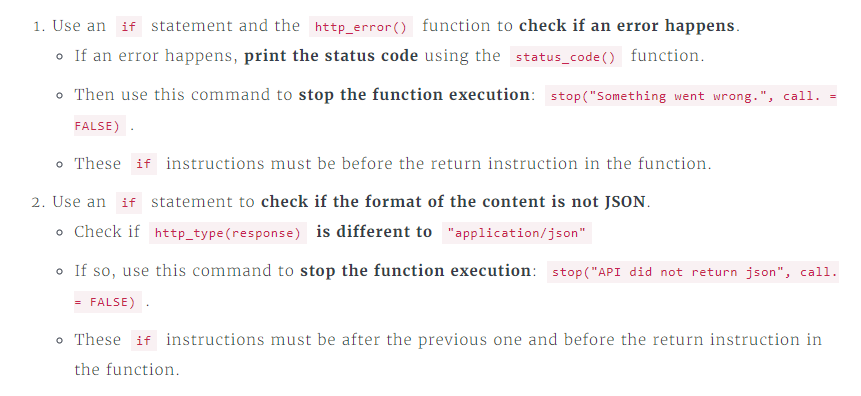

**Answer**

We're now sure that no errors occurred during our API requests. Now, we can extract the content of the API response.

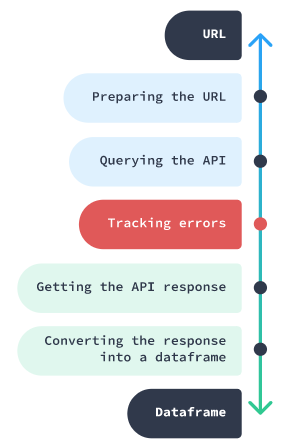

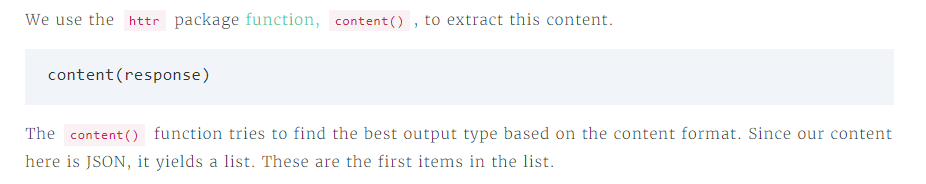

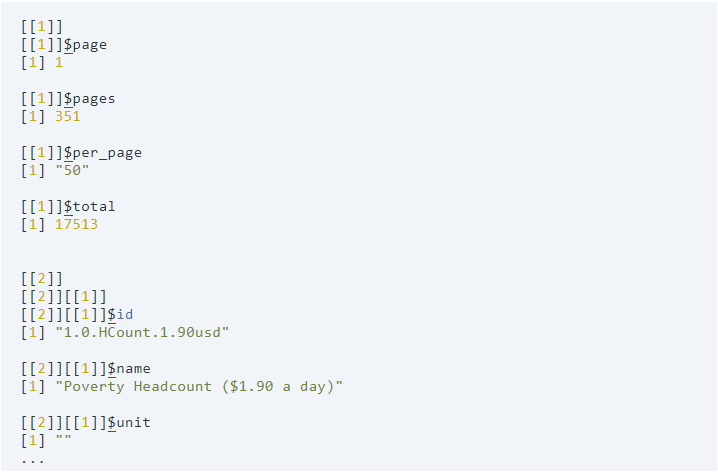

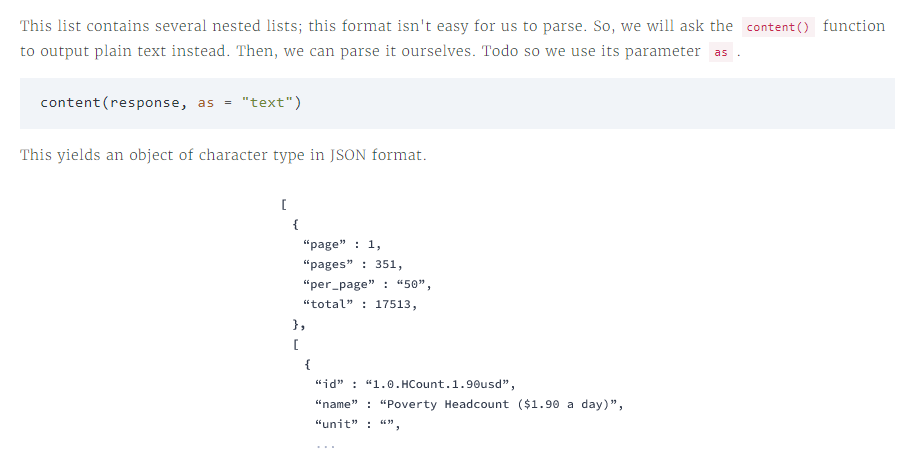

Let's use the `content()` function to extract the content from our `wb_api_json_get_df()` function.

**Task**

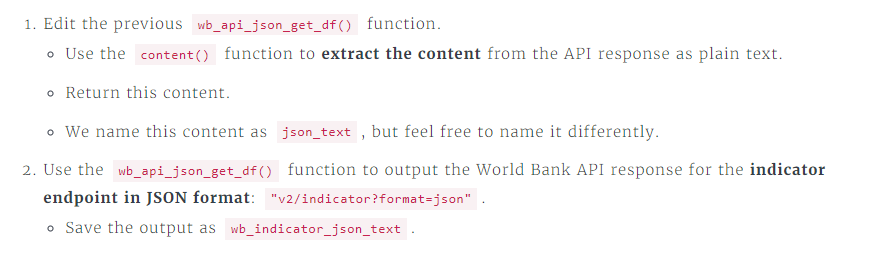

**Answer**

Above, we successfully got the indicator list content in the World Bank APIs. However, this content is in plain text containing JSON data. We will learn how to convert JSON data into a dataframe to manipulate it properly.

JSON data nests lists of values and collections of name/value pairs, as many times as we want.

* The square brackets (`[]`) identify a list of values. This is a set of values or objects separated by commas.
* The curly brackets (`{}`) identify a collection of name/value pairs. Each name/value pair of the collection should be in the following format `"name" : value`. Commas separate the pairs.

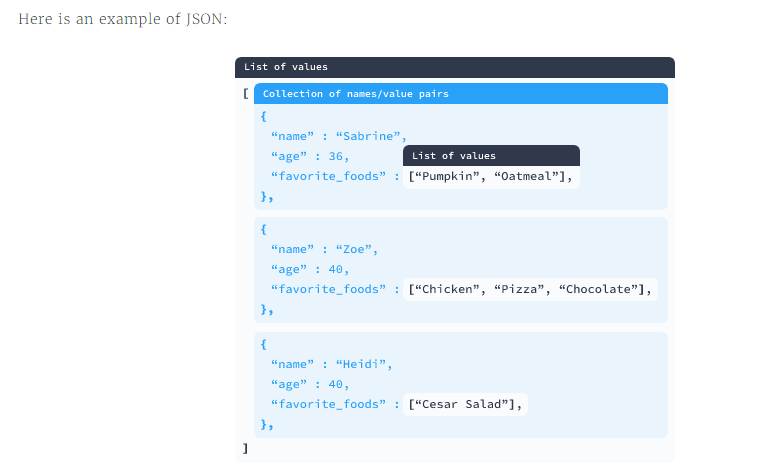

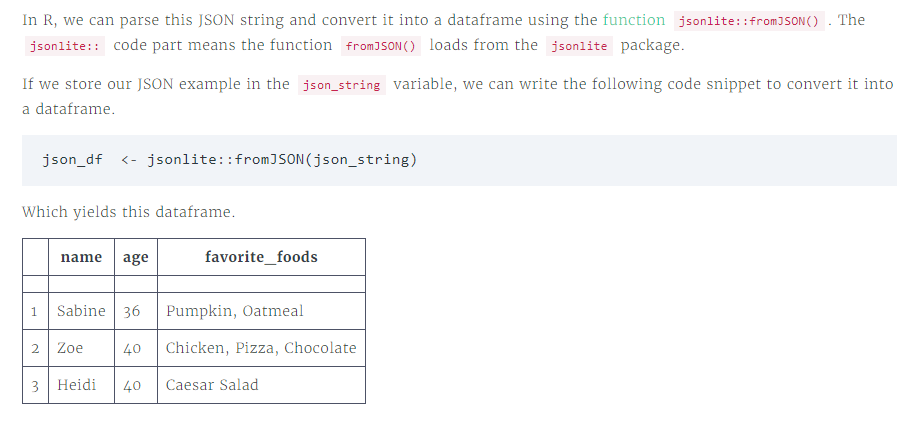

The result of the function is a dataframe. Some columns (e.g., `favorite_foods`) convert into a list if necessary. The structure of the output object of this function depends on the complexity of the JSON data. It's common to do other manipulations or transformations to get a clean dataframe.

Let's use the `fromJSON()` function to convert our content into a dataframe.

**Task**

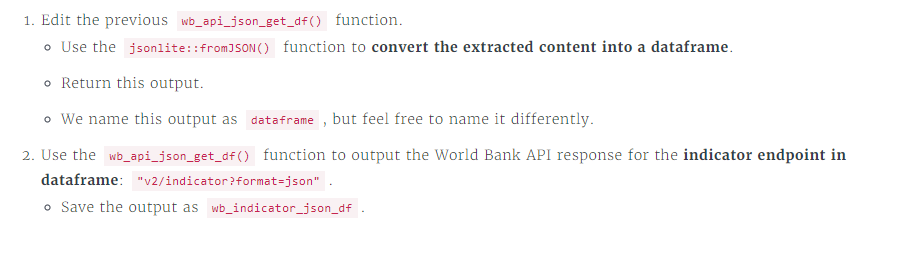

**Answer**

Let's display the structure of the `wb_indicator_json_df` object we created above.

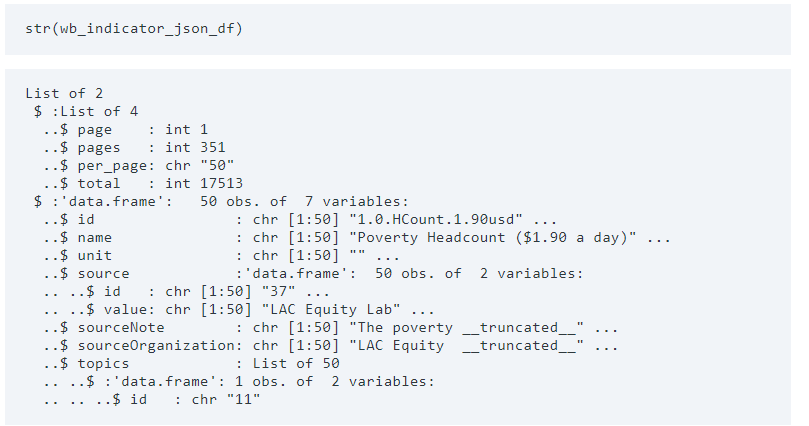

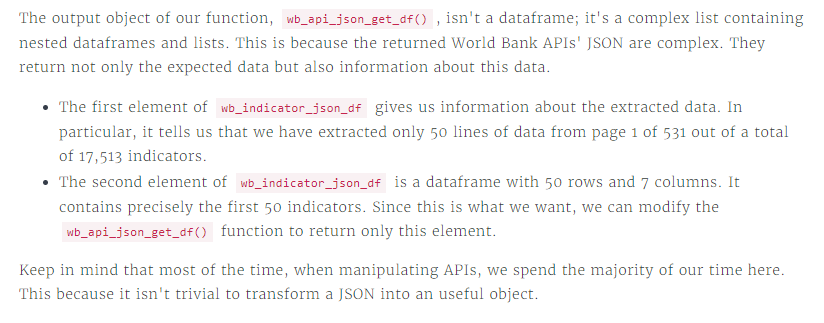

Let's keep only the second element of the complex list as the desired dataframe.

**Task**

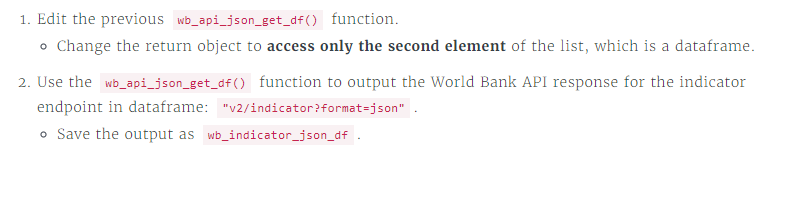

**Answer**

In this file, we began working with APIs and built a convenient tool to extract web data: `wb_api_json_get_df()`.

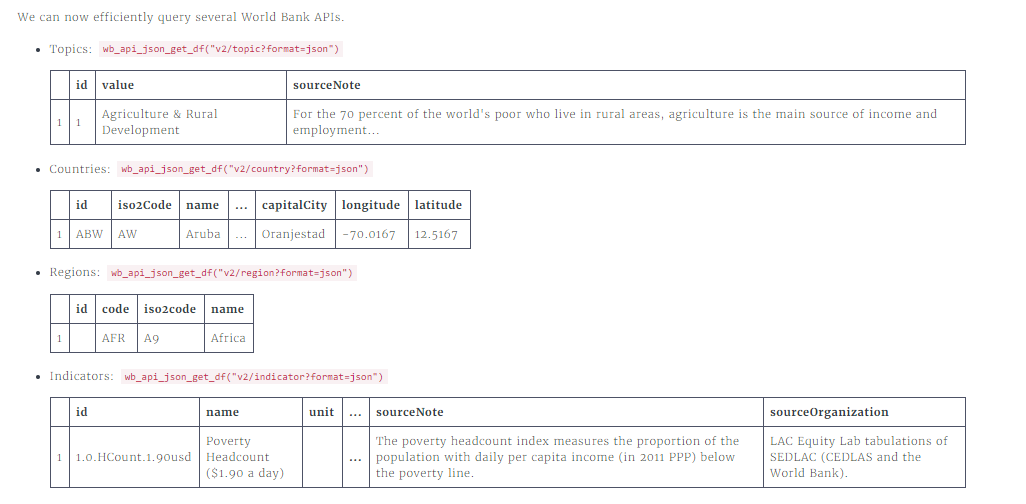